# Building a predictive model

Read in data and set a- and b-feature vector for first 100 primes:

In [23]:
import pandas as pd
import numpy as np

dffile = "./data/ec_rk0-2_cond1000-10000.csv"

df = pd.read_csv(dffile)

# set prime range 
nprimes = 100
first = 1
rg = range(first,first + nprimes)

# set b-variables
a = ['a'+str(j) for j in rg]
for j in rg:
    df['b'+str(j)] = df[a[:j]].mean(axis=1)
    
df

,ec,rank,conductor,a1,a2,a3,a4,a5,a6,a7,...,b91,b92,b93,b94,b95,b96,b97,b98,b99,b100
0,1001.b1,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
1,1001.b2,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
2,1001.b3,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
3,1001.b4,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
4,1002.a1,0,1002,-1,-1,0,0,0,-4,6,...,1.307692,1.554348,1.365591,1.436170,1.231579,0.968750,1.061856,0.948980,0.696970,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59568,9962.a1,2,9962,1,-1,-4,1,-4,-6,-1,...,-1.857143,-1.445652,-1.591398,-1.744681,-1.747368,-1.708333,-1.742268,-2.000000,-2.414141,-2.73
59569,9963.c1,2,9963,0,0,-2,-4,2,-1,-2,...,0.637363,0.413043,0.677419,0.776596,0.305263,0.177083,0.587629,0.397959,0.484848,0.38
59570,9966.c1,2,9966,1,-1,-3,-4,-1,-3,-4,...,-1.186813,-1.391304,-0.967742,-0.968085,-0.905263,-0.697917,-1.061856,-1.275510,-1.404040,-1.43
59571,9978.a1,2,9978,-1,-1,-2,-1,-1,-2,-5,...,-1.065934,-0.826087,-0.903226,-1.106383,-0.715789,-0.583333,-0.670103,-1.071429,-0.858586,-1.05


Quick eyeball of the range of values taken by the feature vectors - here we histogram the _b_-values:

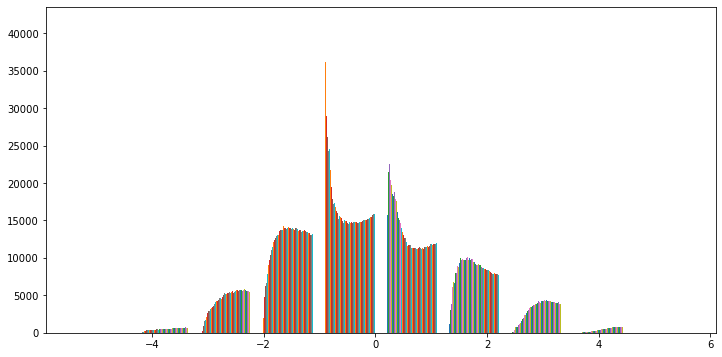

In [26]:
from matplotlib import pyplot as plt

b = ['b'+str(i) for i in rg]

plt.figure(figsize=(12,6))
plt.hist(df[b])
plt.show()

Partition the data frame into training and testing subsets, balanced over the values of _rank_:

In [40]:
from random import shuffle
from math import floor

idx_train = []
idx_test = []

fraction = 0.7
num_classes = 3

for r in range(num_classes):
    idx = [i for i in range(df.shape[0]) if df['rank'][i]==r]
    shuffle(idx)
    n = floor(fraction * len(idx))
    idx_train += [idx[:n]]
    idx_test += [idx[n:]]
    
# check the lists have the right sizes:
for r in range(num_classes):
    print(len(idx_train[r]) + len(idx_test[r]) == df[df['rank']==r].shape[0])
    
df_train = df.iloc[sum([idx_train[r] for r in range(num_classes)],[])]
df_test = df.iloc[sum([idx_test[r] for r in range(num_classes)],[])]

print(f'Training data {df_train.shape}')
print(f'Test data {df_test.shape}')

True
True
True
Training data (41700, 1103)
Test data (17873, 1103)


Transform to _numpy_ arrays for consumption by _tensorflow_. We build feature vectors from the _a_ and _b_ values separately, for comparison, and do a final check on the class distributions in the training and test sets:

In [29]:
from collections import Counter

xa_train = df_train[a].to_numpy().astype("float32")
xa_test = df_test[a].to_numpy().astype("float32")
xb_train = df_train[b].to_numpy().astype("float32")
xb_test = df_test[b].to_numpy().astype("float32")
y_train = df_train['rank'].to_numpy()
y_test = df_test['rank'].to_numpy()

# make sure images have shape (100, 1)
xa_train = np.expand_dims(xa_train, -1)
xa_test = np.expand_dims(xa_test, -1)
xb_train = np.expand_dims(xb_train, -1)
xb_test = np.expand_dims(xb_test, -1)

print("x_train shape:", xb_train.shape)
print(xb_train.shape[0], "train samples")
print(xb_test.shape[0], "test samples")
print(f'Training classes {dict(Counter(y_train))}')
print(f'Test classes {dict(Counter(y_test))}')

x_train shape: (41700, 100, 1)
41700 train samples
17873 test samples
Training classes {0: 19142, 1: 20899, 2: 1659}
Test classes {0: 8204, 1: 8958, 2: 711}


Finally, define Python class for tracking the loss during training; and transform the class variable to one-hot vectors:

In [30]:
from tensorflow.keras import utils

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# convert class vectors to binary class matrices
y_train_bin = utils.to_categorical(y_train, num_classes)
y_test_bin = utils.to_categorical(y_test, num_classes)

## Logistic regression

Start with logistic regression models (as baseline for any neural network approach). We'll build one for each of the _a_ and _b_ feature vectors:

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback

model_a_lr = Sequential([
    Flatten(input_shape=(100,)),
    Dense(num_classes, activation="softmax")
])
model_a_lr.compile(loss = 'categorical_crossentropy',
                 optimizer = SGD(learning_rate=0.01, momentum=0.01, nesterov=True))
model_b_lr = Sequential([
    Flatten(input_shape=(100,)),
    Dense(num_classes, activation="softmax")
])
model_b_lr.compile(loss = 'categorical_crossentropy',
                 optimizer = SGD(learning_rate=0.01, momentum=0.01, nesterov=True))

model_b_lr.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 3)                 303       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the models:

Epoch 1/10
2085/2085 [==============================] - 3s 1ms/step - loss: 2.2119
Epoch 2/10
2085/2085 [==============================] - 3s 1ms/step - loss: 1.6813
Epoch 3/10
2085/2085 [==============================] - 2s 1ms/step - loss: 1.4005
Epoch 4/10
2085/2085 [==============================] - 3s 1ms/step - loss: 1.2002
Epoch 5/10
2085/2085 [==============================] - 3s 1ms/step - loss: 1.0272
Epoch 6/10
2085/2085 [==============================] - 3s 1ms/step - loss: 0.8901
Epoch 7/10
2085/2085 [==============================] - 2s 1ms/step - loss: 0.7957
Epoch 8/10
2085/2085 [==============================] - 3s 1ms/step - loss: 0.7434
Epoch 9/10
2085/2085 [==============================] - 2s 1ms/step - loss: 0.6743
Epoch 10/10
2085/2085 [==============================] - 2s 1ms/step - loss: 0.6473
Epoch 1/10
2085/2085 [==============================] - 3s 1ms/step - loss: 0.2739
Epoch 2/10
2085/2085 [==============================] - 2s 1ms/step - loss: 0.1785
Epo

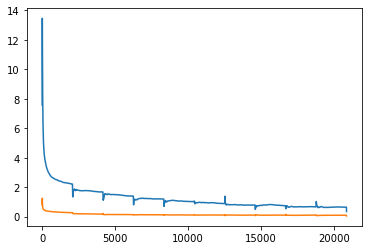

In [36]:
history_a = LossHistory()
model_a_lr.fit(xa_train, y_train_bin, 
          batch_size = 20,
          epochs = 10,
          verbose = 1, 
          callbacks = [history_a])
history_b = LossHistory()
model_b_lr.fit(xb_train, y_train_bin, 
          batch_size = 20,
          epochs = 10,
          verbose = 1, 
          callbacks = [history_b])

# show the SGD progress:
def movingaverage(x, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(x, window, 'same')

plt.plot(movingaverage(history_a.losses, 20))
plt.plot(movingaverage(history_b.losses, 20))
plt.show()

Compute the respective confusion matrices on the test data:

In [39]:
tp_a = model_a_lr.predict(xa_test)
pred_a = np.array( [np.argmax( tp_a[i] ) for i in range(len(tp_a))] )
ct_a = pd.crosstab(y_test, 
                 pred_a, 
                 rownames=["Actual"], 
                 colnames=["Predicted"], 
                 margins=False)

display(ct_a)
print(f'Model a overall accuracy: {sum( np.diagonal(ct_a) )/len( y_test )}')

tp_b = model_b_lr.predict(xb_test)
pred_b = np.array( [np.argmax( tp_b[i] ) for i in range(len(tp_b))] )
ct_b = pd.crosstab(y_test, 
                 pred_b, 
                 rownames=["Actual"], 
                 colnames=["Predicted"], 
                 margins=False)

display(ct_b)
print(f'Model b overall accuracy: {sum( np.diagonal(ct_b) )/len( y_test )}')

559/559 [==============================] - 2s 3ms/step


Predicted,0,1,2
Actual,,,
0,7691,395,118
1,234,8033,691
2,0,202,509


Model a overall accuracy: 0.9082414815643708

559/559 [==============================] - 1s 2ms/step


Predicted,0,1,2
Actual,,,
0,7928,248,28
1,130,8823,5
2,0,7,704


Model b overall accuracy: 0.9766127678621385


As expected (from the _tsne_ notebook), the _b_ model does much better. However, the _a_ model does much better than I expected (for logistic regression as opposed to a nonlinear model) - this is consistent with the DANGER paper.

## Multilayer model

Now add a couple of dense layers between the input and the softmax:

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback

model_mlp = Sequential([
    Flatten(input_shape=(100,)),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(num_classes, activation="softmax")
])
model_mlp.compile(loss = 'categorical_crossentropy',
                 optimizer = SGD(learning_rate=0.01, momentum=0.01, nesterov=True))

model_mlp.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 3)                 303       
                                                                 
Total params: 20503 (80.09 KB)
Trainable params: 20503 (80.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Choose your feature vector. We'll stick with _b_ and not bother with the side-by-side comparison this time - the _a_ vectors perform less well than _b_, as expected, but improve on their logistic model performance.

Epoch 1/20
2085/2085 [==============================] - 3s 1ms/step - loss: 0.0983
Epoch 2/20
2085/2085 [==============================] - 3s 1ms/step - loss: 0.0355
Epoch 3/20
2085/2085 [==============================] - 3s 1ms/step - loss: 0.0254
Epoch 4/20
2085/2085 [==============================] - 3s 1ms/step - loss: 0.0200
Epoch 5/20
2085/2085 [==============================] - 3s 2ms/step - loss: 0.0170
Epoch 6/20
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0148
Epoch 7/20
2085/2085 [==============================] - 3s 1ms/step - loss: 0.0129
Epoch 8/20
2085/2085 [==============================] - 3s 1ms/step - loss: 0.0116
Epoch 9/20
2085/2085 [==============================] - 3s 1ms/step - loss: 0.0104
Epoch 10/20
2085/2085 [==============================] - 3s 1ms/step - loss: 0.0096
Epoch 11/20
2085/2085 [==============================] - 3s 2ms/step - loss: 0.0089
Epoch 12/20
2085/2085 [==============================] - 3s 1ms/step - loss: 0.0082
E

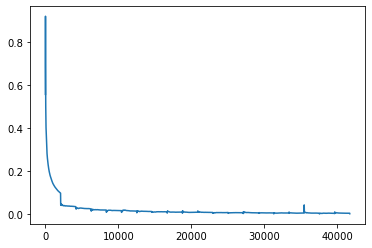

In [51]:
x_train = xb_train
x_test = xb_test

history_mlp = LossHistory()
model_mlp.fit(x_train, y_train_bin, 
          batch_size = 20,
          epochs = 20,
          verbose = 1, 
          callbacks = [history_mlp])

# show the SGD progress:
plt.plot(movingaverage(history_mlp.losses, 20))
plt.show()

Model performance on the test data:

In [52]:
tp = model_mlp.predict(x_test)
pred = np.array( [np.argmax( tp[i] ) for i in range(len(tp))] )
ct = pd.crosstab(y_test, 
                 pred, 
                 rownames=["Actual"], 
                 colnames=["Predicted"], 
                 margins=False)

display(ct)
print(f'Model overall accuracy: {sum( np.diagonal(ct) )/len( y_test )}')

559/559 [==============================] - 1s 1ms/step


Predicted,0,1,2
Actual,,,
0,8185,16,3
1,28,8930,0
2,2,0,709


Model overall accuracy: 0.997258434510155
